In [45]:
import pandas as pd
rv = pd.read_csv('RestaurantVisitors.csv' , index_col = 'date' ,parse_dates = True)
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [2]:
# Using sarima we can handle sesonality but we can't handle external Factors like holidays 
# to Handle external factors we have SARIMAX

In [46]:
rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [3]:
rv.shape

(517, 8)

In [5]:
rv.isnull().sum() # we have to predict for the remaining null values

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [6]:
rv = rv.dropna()   # we should drop initially because sarimax can't happens with nulls
rv.isnull().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

In [7]:
rv.shape

(478, 8)

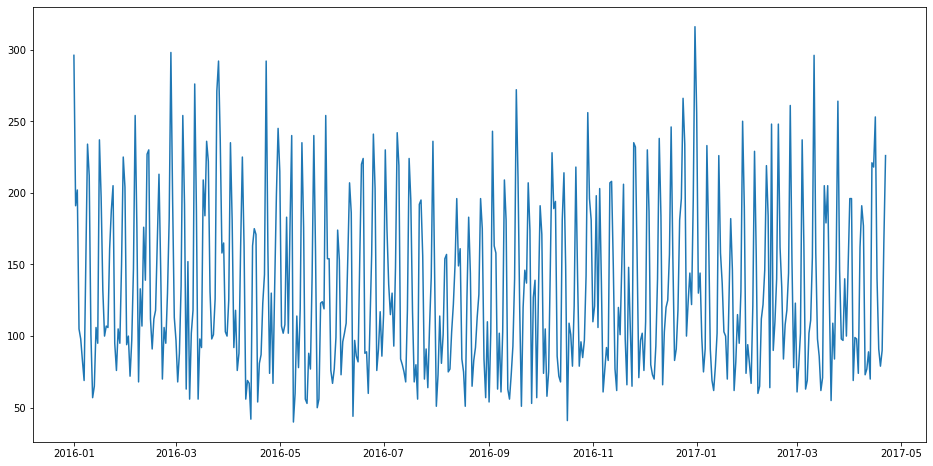

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.plot(rv.total) # data seems to be seasonal and stationery

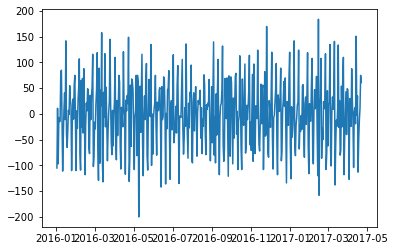

In [11]:
plt.plot(rv.total.diff())

In [12]:
rv[rv.holiday == 1]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-18,Monday,1,Martin Luther King Day,10.0,19.0,19.0,84.0,132.0
2016-02-02,Tuesday,1,Groundhog Day,43.0,6.0,19.0,32.0,100.0
2016-02-14,Sunday,1,Valentine's Day,30.0,32.0,47.0,121.0,230.0
2016-02-15,Monday,1,Presidents Day,7.0,32.0,30.0,43.0,112.0
2016-03-17,Thursday,1,St. Patrick's Day,67.0,22.0,65.0,55.0,209.0
2016-03-25,Friday,1,Good Friday,75.0,91.0,64.0,41.0,271.0
2016-03-27,Sunday,1,Easter,25.0,61.0,47.0,104.0,237.0
2016-03-28,Monday,1,Easter Monday,35.0,21.0,58.0,44.0,158.0


In [13]:
index_pos = rv[rv.holiday == 1].index  # exxtracted the dates where holiday is coming
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

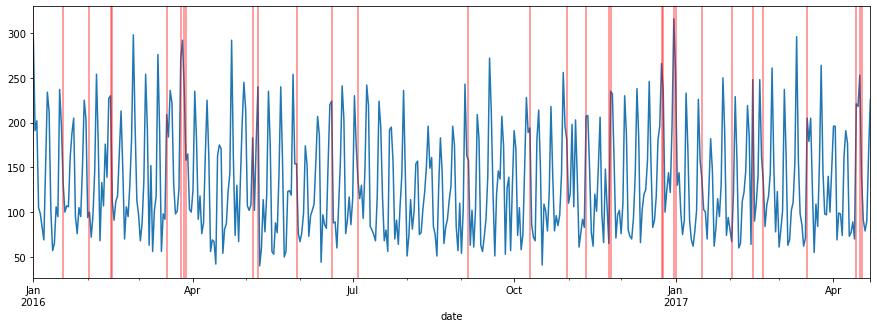

In [15]:
ax = rv['total'].plot(figsize = (15,5))
for days in index_pos:
    ax.axvline(x = days , color = 'red' , alpha = 0.5)
# whenever holidays are coming values suddenly increases
# so while doing the forecasting i need to take care of hoidays

The Previous line of code creates a vertical line on an axis object (ax) at the position specified by the variable "day", with a color of "red" and transparency (alpha) of 0.5. It can be used in a plot to mark a specific point or date on the x-axis.

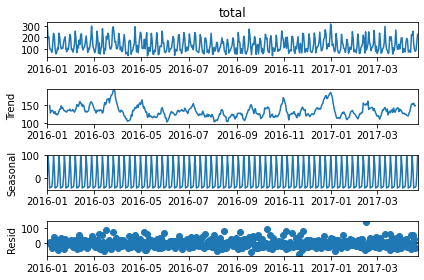

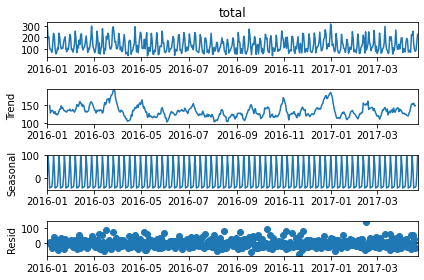

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal = seasonal_decompose(rv.total)
rv_seasonal.plot()

In [24]:
# lets build and evaluate model
# lets do sequential sampling on our data
train_tv = rv.iloc[0:450]
test_tv = rv.iloc[450:479]

In [25]:
# lets run a auto arima and whatever values we get we will pass in sarima
import pmdarima
from pmdarima import auto_arima
auto_arima(rv.total , seasonal = True , m = 7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# p,d,q is a hyperparameter we can change it
model1 = SARIMAX(train_tv.total , order = (0,0,0) , seasonal_order = (1,0,1,7))

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
results = model1.fit()
pred_rv = results.predict(start = 450 , end = 477)
pred_rv

2017-03-26    174.188668
2017-03-27     90.608896
2017-03-28     95.760665
2017-03-29     95.480398
2017-03-30     96.687740
2017-03-31    145.285587
2017-04-01    232.776872
2017-04-02    174.177705
2017-04-03     90.603194
2017-04-04     95.754638
2017-04-05     95.474389
2017-04-06     96.681655
2017-04-07    145.276444
2017-04-08    232.762222
2017-04-09    174.166743
2017-04-10     90.597491
2017-04-11     95.748612
2017-04-12     95.468380
2017-04-13     96.675571
2017-04-14    145.267301
2017-04-15    232.747573
2017-04-16    174.155782
2017-04-17     90.591790
2017-04-18     95.742586
2017-04-19     95.462372
2017-04-20     96.669486
2017-04-21    145.258158
2017-04-22    232.732925
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
error = test_tv.total  - pred_rv
mse_model1 = np.mean(np.square(error))
mse_model1  # this model was created without using holidays

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

875.5111678818388

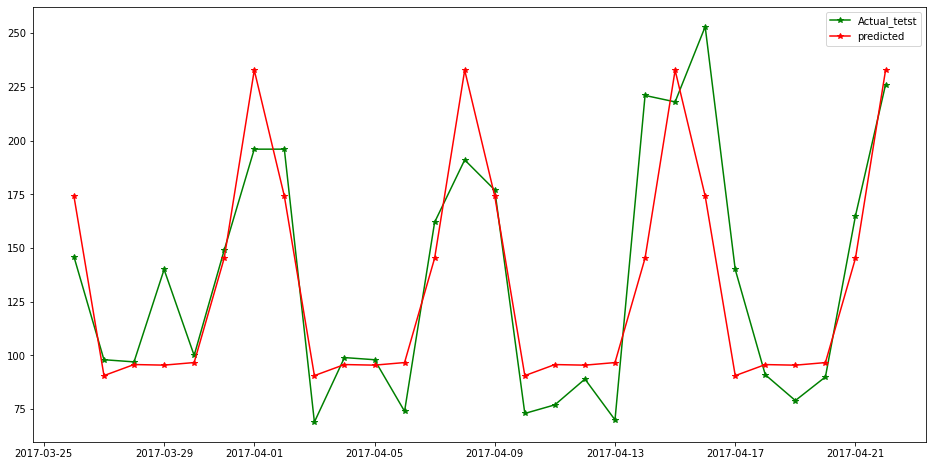

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16 , 8))
plt.plot(test_tv.total , marker = '*' , color = 'g' , label = 'Actual_tetst')
plt.plot(pred_rv , marker = '*' , color = 'red' , label = 'predicted')
plt.legend()

In [32]:
test_tv[test_tv.holiday == 1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

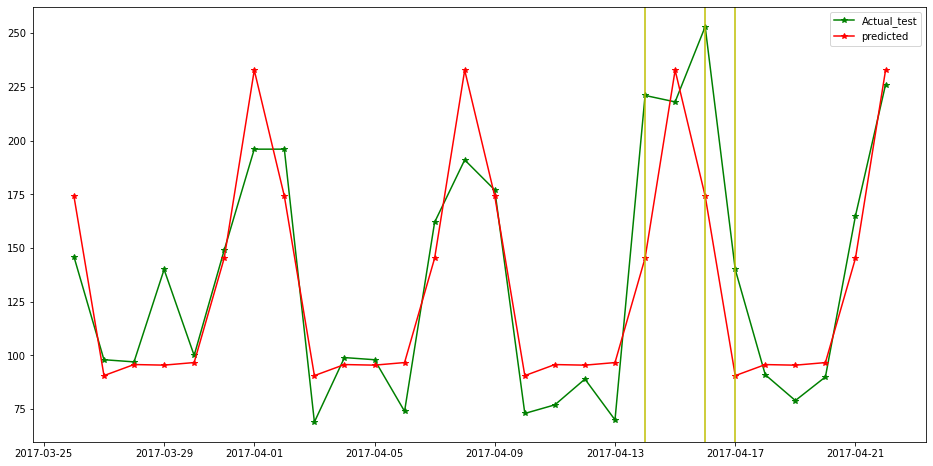

In [33]:
plt.figure(figsize = (16,8))
plt.plot(test_tv.total , marker = '*' , color = 'g' , label = 'Actual_test')
plt.plot(pred_rv , marker = '*' , color = 'r' , label = 'predicted')
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17' , color = 'y')
plt.legend()

In [34]:
# normally when holidays come there should be sudden increase the values (number of visitors)
# Lets check if the same thing is shown in our predicted values)
# no for hoildays our model fails you can see this in bfore graph

In [35]:
 # Now sarima ends with drawback and SARIMAX comes 

In [36]:
# applying exog means we applying sarimax  , there is no use of seasonal_decompose exog having all the parameters
# ab aage se hum exog hi use krenge ye universal hai jisme arima , sarima ye sab sarimax me ajayega
auto_arima(rv.total , seasonal = True , m = 7 , exog = rv[['holiday']])
# holiday is 1 of the external factor , but in some another datasets there can be more than 1 exteral factors also

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [38]:
model2 = SARIMAX(train_tv.total , order = (0,0,0) , seasonal_order = (1,0,1,7) , exog = train_tv[['holiday']]) 

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [39]:
results2 = model2.fit()
pred_values = results2.predict(start = 450 , end = 477 , exog = test_tv[['holiday']])
pred_values

2017-03-26    168.897272
2017-03-27     80.492063
2017-03-28     92.838488
2017-03-29     95.492588
2017-03-30     92.201319
2017-03-31    138.791449
2017-04-01    229.123196
2017-04-02    168.889327
2017-04-03     80.488277
2017-04-04     92.834121
2017-04-05     95.488096
2017-04-06     92.196982
2017-04-07    138.784921
2017-04-08    229.112418
2017-04-09    168.881383
2017-04-10     80.484491
2017-04-11     92.829754
2017-04-12     95.483605
2017-04-13     92.192645
2017-04-14    208.159676
2017-04-15    229.101641
2017-04-16    238.254722
2017-04-17    149.861988
2017-04-18     92.825387
2017-04-19     95.479113
2017-04-20     92.188309
2017-04-21    138.771864
2017-04-22    229.090865
Freq: D, Name: predicted_mean, dtype: float64

In [40]:
error2 = test_tv.total - pred_values
mse2 = np.mean(np.square(error2))
mse2 # lower the mseb betttr the model
# mse is reducing after taking care of hoildays which implies model has improved

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

350.43422643456523

## Comparison 

In [42]:
df2 = pd.DataFrame()
df2['original'] = test_tv.total
df2['pred_withoutholidays'] = pred_rv
df2['pred_withholidays'] = pred_values
df2

,original,pred_withoutholidays,pred_withholidays
date,,,
2017-03-26,146.0,174.188668,168.897272
2017-03-27,98.0,90.608896,80.492063
2017-03-28,97.0,95.760665,92.838488
2017-03-29,140.0,95.480398,95.492588
2017-03-30,100.0,96.687740,92.201319
2017-03-31,149.0,145.285587,138.791449
2017-04-01,196.0,232.776872,229.123196
2017-04-02,196.0,174.177705,168.889327
2017-04-03,69.0,90.603194,80.488277


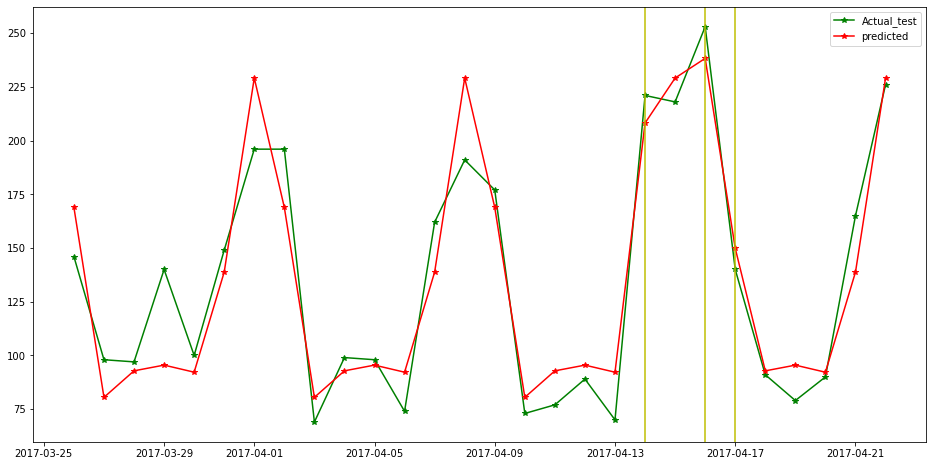

In [44]:
plt.figure(figsize = (16,8))
plt.plot(test_tv.total , marker = '*' , color = 'g' , label = 'Actual_test')
plt.plot(pred_values, marker = '*' , color = 'r' , label = 'predicted')
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17',  color = 'y')
plt.legend()

# As you can see my model is good with sarimax 